In [8]:
#!/usr/bin/python
# coding=utf-8
import KNN
from numpy import *
import numpy as np
from sklearn.decomposition import PCA

X_study = np.loadtxt('data_study.txt')#此处要进行np的import  import numpy as np
X_check = np.loadtxt('data_check.txt')
#获取标签,原来的标签是最后一行，并且是2和4，要改一下
label = X_study[:,9]
label = label/2 -1
for i in range(len(label)): 
    if label[i] == 0: 
        label[i] = 1
    else:
        label[i] = 0
X_study = np.delete(X_study,9,axis=1)
#数据标准化
#scaler = preprocessing.StandardScaler()
#X_scaled = scaler.fit_transform(X)

#映射到均匀分布
#quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
#x_pac = quantile_transformer.fit_transform(X_scaled)


#PCA降到一维，实验证明，这样效果最好
pca=PCA(n_components=1)
pca.fit(X_study)
x_study = pca.transform(X_study)

# 生成数据集和类别标签
#dataSet, labels = KNN.createDataSet()
# 定义一个未知类别的数据
#testX = array([1.2, 1.0])
k = 3
# 调用分类函数对未知数据分类
outputLabel = KNN.kNN_Classify(X_check, X_study, label, 3)
print("Your input is:", testX, "and classified to class: ", outputLabel)
 
#testX = array([0.1, 0.3])
#outputLabel = KNN.kNN_Classify(testX, dataSet, labels, 3)
#print("Your input is:", testX, "and classified to class: ", outputLabel)

ValueError: operands could not be broadcast together with shapes (91700,10) (175,9) 

In [5]:
import numpy as np
from math import sqrt
from collections import Counter
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing

X_study = np.loadtxt('data_study.txt')#此处要进行np的import  import numpy as np
X_check = np.loadtxt('data_check.txt')
#获取标签,原来的标签是最后一行，并且是2和4，要改一下
labels = X_study[:,9]
labels = labels/2 -1
for i in range(len(labels)): 
    if labels[i] == 0: 
        labels[i] = 1
    else:
        labels[i] = 0
X_study = np.delete(X_study,9,axis=1)
label_check = X_check[:,9]
label_check = label_check/2 -1
for i in range(len(label_check)): 
    if label_check[i] == 0: 
        label_check[i] = 1
    else:
        label_check[i] = 0
X_check = np.delete(X_check,9,axis=1)
#print(labels)
total = list()

pca=PCA(n_components=3)
pca.fit(X_study)
x_study = pca.transform(X_study)

pca.fit(X_check)
x_check = pca.transform(X_check)

def distance(k, X_train, Y_train, x):
    assert 1 <= k <= X_train.shape[0], "K must be valid"
    assert X_train.shape[0] == Y_train.shape[0], "the size of X_train must equal to the size of y_train"
    assert X_train.shape[1] == x.shape[0], "the feature number of x must be equal to X_train"
    distance = [np.sum(abs(x_train - x)) for x_train in X_train]
    nearest = np.argsort(distance)
    topk_y = [Y_train[i] for i in nearest[:k]]
    votes = Counter(topk_y)
    return votes.most_common(1)[0][0]


if __name__ == "__main__":
    for xr in x_check:
    #x = np.array([8,4,5,1,2,1,7,3,1])
        label = distance(3, x_study, labels, xr)
        #print(label)
        
        total.append(label)
    #print(total)
    
    result_NMI=metrics.normalized_mutual_info_score(label_check, total)
    print("result_NMI:",result_NMI)

result_NMI: 0.8391705180325764


/home/liyunzhe/Downloads/enter/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [31]:
# 这里引入所用到的包
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# 读入数据
iris = pd.read_csv("breast.txt",encoding='gb2312',sep=' ') # the iris dataset is now a Pandas DataFrame
#data = pd.read_table('Z:/test.txt',header=None,encoding='gb2312',sep=',',index_col=0)
iris2 = pd.read_csv("data_check.txt",sep='\t')
# 看下数据前5行
iris.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,NaN
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0,NaN
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,NaN
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0,NaN
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,NaN


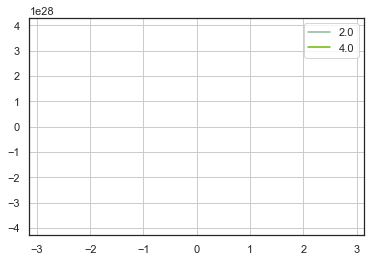

In [32]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these

pd.plotting.andrews_curves(iris, '9')

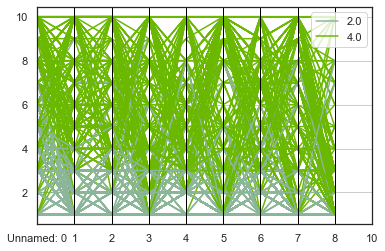

In [33]:
pd.plotting.parallel_coordinates(iris, '9')